In [198]:
import seaborn as sns

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get Clean Trial Dataframe


In [200]:
df = pd.read_pickle('Random_GMRQ-2_GMRQ-CSE-clean.pickl')

In [201]:
df.head()


,id,feature,parameters,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores,test_scores_mean,cse_test_scores_mean,cse_train_gaps_mean
947,2,alpha_angle,"{'cluster__max_iter': 100, 'tica__shrinkage': ...","[2.7929254738960707, 2.806366141062694, 2.6499...","[2.8238005249605154, 2.870721463825274, 2.9884...","[1.96372272307, 1.99871800747, 1.98917327543, ...","[3.97634298203, 16.9731128258, 42.2860267941, ...","[1, 1, 1, 1, 2]","[1.99048647384, 1.99925393958, 1.99986176834, ...",2.613855,2.185815,16.218150
76,4,alpha_angle,"{'cluster__max_iter': 100, 'tica__shrinkage': ...","[2.948540113694251, 2.632606230422432, 2.87014...","[2.993834214901289, 2.978360161399329, 2.99909...","[5.40378045921, 3.88709659215, 1.95245287852, ...","[2.89773741805, 6.58039903006, 17.0715041883, ...","[5, 3, 1, 2, 1]","[5.86174757165, 3.9922788621, 1.99992166853, 2...",2.878763,3.207427,55.256862
185,6,alpha_angle,"{'cluster__max_iter': 100, 'tica__shrinkage': ...","[2.8355832551294116, 2.797077185532208, 2.9419...","[2.988991097899673, 2.988911714909688, 2.96883...","[3.96753580727, 1.04006171277, 1.98876260165, ...","[6.07544374367, 7.03832034915, 9.79304485609, ...","[3, 1, 1, 1, 1]","[3.99813757815, 1.99584083871, 1.99928381, 1.9...",2.854033,2.192817,8.602277
156,9,alpha_angle,"{'cluster__max_iter': 100, 'tica__shrinkage': ...","[2.9285516205713424, 2.9291847481528452, 2.753...","[2.9864581304902513, 2.9989612038793534, 2.993...","[3.95488077094, 5.77773573576, 1.98281164301, ...","[7.42148030392, 3.63886726367, 2.49065547955, ...","[4, 5, 1, 1, 2]","[4.99566202191, 5.88255149676, 1.98998041233, ...",2.899212,3.331260,5.046018
598,10,alpha_angle,"{'cluster__max_iter': 100, 'tica__shrinkage': ...","[2.4553791201375583, 2.6627698094407846, 2.968...","[2.9900799384401084, 2.9986592591934484, 2.999...","[1.79557463816, 2.9029146451, 1.91596141711, 3...","[8.89778260185, 7.8866024239, 8.51082248122, 3...","[1, 2, 1, 4, 1]","[1.99906414361, 2.99248978623, 1.99816377148, ...",2.734088,2.465030,8.204928


## Extract optimized parameters

In [202]:
params = ['cluster__n_clusters', 'tica__n_components', 'tica__lag_time']
for param in params:
    
    df[param.split('__')[-1]] = df.loc[:, 'parameters'].apply(lambda x: x[param])

In [203]:
df.drop(labels='parameters', axis=1, inplace=True)
df.sort_values(inplace=True, by='id', axis=0)


In [204]:
df.reset_index(inplace=True, drop=True)
df.tail()

,id,feature,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores,test_scores_mean,cse_test_scores_mean,cse_train_gaps_mean,n_clusters,n_components,lag_time
1395,1595,kappa_angle,"[2.9778507119161013, 2.977666366217146, 2.9127...","[2.989884911958553, 2.9981512930130636, 2.9992...","[1.97873366802, 1.84787931259, 5.23145327531, ...","[51.6742711651, 2.57566906269, 4.00230806729, ...","[1, 1, 5, 1, 1]","[1.99978588427, 1.99927533271, 5.98289346315, ...",2.933539,2.577327,25.529712,135,3,6
1396,1596,kappa_angle,"[2.893758216168439, 2.921066001233427, 2.91283...","[2.9830479849845926, 2.9814256285048852, 2.971...","[1.98492963176, 1.8967867718, 1.9374469928, 1....","[42.7807805236, 13.6651220403, 3.87036799422, ...","[1, 1, 1, 1, 1]","[1.99932218096, 1.99794953139, 1.95508483814, ...",2.826057,1.960478,17.214900,201,1,2
1397,1598,kappa_angle,"[2.9012213198403143, 2.9554545705217903, 2.926...","[2.9921379037506384, 2.987473859268675, 2.9961...","[3.79275931452, 1.92144240539, 1.97287294527, ...","[5.82849765967, 47.2297860934, 39.6911710508, ...","[3, 1, 1, 1, 1]","[3.99903795894, 1.99986549468, 1.99982878322, ...",2.905137,2.324069,25.281404,18,2,4
1398,1599,kappa_angle,"[2.926929898706872, 2.9485174159909544, 2.7109...","[2.999359526948865, 2.9995511714635783, 2.9994...","[3.67046444391, 4.86735617895, 1.91230413678, ...","[3.05176649899, 3.69996140165, 14.2000473401, ...","[3, 4, 1, 6, 2]","[3.99845868064, 4.99733467389, 1.99999194083, ...",2.864565,3.631730,5.654463,864,7,92
1399,1600,kappa_angle,"[2.386732113810725, 2.9131472639644396, 2.5027...","[2.9991153526457315, 2.999509147509655, 2.9967...","[1.98992051238, 1.94354839241, 1.95405154025, ...","[4.83919484952, 2.37997465356, 9.50832993957, ...","[1, 1, 1, 1, 1]","[1.99994165696, 1.99984347458, 1.99980521681, ...",2.622897,1.962600,5.305808,103,9,24


In [205]:
df.tail()

,id,feature,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores,test_scores_mean,cse_test_scores_mean,cse_train_gaps_mean,n_clusters,n_components,lag_time
1395,1595,kappa_angle,"[2.9778507119161013, 2.977666366217146, 2.9127...","[2.989884911958553, 2.9981512930130636, 2.9992...","[1.97873366802, 1.84787931259, 5.23145327531, ...","[51.6742711651, 2.57566906269, 4.00230806729, ...","[1, 1, 5, 1, 1]","[1.99978588427, 1.99927533271, 5.98289346315, ...",2.933539,2.577327,25.529712,135,3,6
1396,1596,kappa_angle,"[2.893758216168439, 2.921066001233427, 2.91283...","[2.9830479849845926, 2.9814256285048852, 2.971...","[1.98492963176, 1.8967867718, 1.9374469928, 1....","[42.7807805236, 13.6651220403, 3.87036799422, ...","[1, 1, 1, 1, 1]","[1.99932218096, 1.99794953139, 1.95508483814, ...",2.826057,1.960478,17.214900,201,1,2
1397,1598,kappa_angle,"[2.9012213198403143, 2.9554545705217903, 2.926...","[2.9921379037506384, 2.987473859268675, 2.9961...","[3.79275931452, 1.92144240539, 1.97287294527, ...","[5.82849765967, 47.2297860934, 39.6911710508, ...","[3, 1, 1, 1, 1]","[3.99903795894, 1.99986549468, 1.99982878322, ...",2.905137,2.324069,25.281404,18,2,4
1398,1599,kappa_angle,"[2.926929898706872, 2.9485174159909544, 2.7109...","[2.999359526948865, 2.9995511714635783, 2.9994...","[3.67046444391, 4.86735617895, 1.91230413678, ...","[3.05176649899, 3.69996140165, 14.2000473401, ...","[3, 4, 1, 6, 2]","[3.99845868064, 4.99733467389, 1.99999194083, ...",2.864565,3.631730,5.654463,864,7,92
1399,1600,kappa_angle,"[2.386732113810725, 2.9131472639644396, 2.5027...","[2.9991153526457315, 2.999509147509655, 2.9967...","[1.98992051238, 1.94354839241, 1.95405154025, ...","[4.83919484952, 2.37997465356, 9.50832993957, ...","[1, 1, 1, 1, 1]","[1.99994165696, 1.99984347458, 1.99980521681, ...",2.622897,1.962600,5.305808,103,9,24


## Split the dataset 

In [206]:
params = [x.split('__')[-1] for x in params]

fixed = df.loc[:,['id', 'feature', 'test_scores_mean']+ params]
fixed.rename(columns={'test_scores_mean':'score'}, inplace=True)
fixed.head()

csp = df.loc[:, ['id', 'feature', 'cse_test_scores_mean']+ params]
csp.rename(columns={'cse_test_scores_mean':'score'}, inplace=True)
csp.head()



,id,feature,score,n_clusters,n_components,lag_time
0,2,alpha_angle,2.185815,101,1,3
1,4,alpha_angle,3.207427,537,5,120
2,6,alpha_angle,2.192817,960,6,1
3,9,alpha_angle,3.331260,990,4,257
4,10,alpha_angle,2.465030,128,7,3


## Add the incumbent

In [213]:
def f(group):
    
    best = group['score'].cummax()
    
    N = len(group)
    iteration = pd.Series(np.arange(N), group.index)
    
    is_best = group['score'] == best
    
    result = pd.DataFrame({'id': group['id'], 
                        'iteration': iteration,
                         'score' : best, 
                         'feature': group['feature']})
    
    for param in params:
    
        var = pd.Series(np.array([np.nan]*N), group.index)
        var[is_best] = group.loc[is_best, param]
        var = var.fillna(method='pad')
        result[param] = var
        
    return result
                         

In [214]:
df1 = fixed.groupby('feature').apply(f)
df1['method'] = 'fixed'
print(df1.shape)
df2 = csp.groupby('feature').apply(f)
df2['method'] = 'csp'
print(df2.shape)

(1400, 8)
(1400, 8)


In [215]:
value_vars = ['score'] + params

df1 = pd.melt(df1, id_vars=['id', 'iteration', 'method', 'feature'], value_vars=value_vars)
df2 = pd.melt(df2, id_vars=['id', 'iteration', 'method', 'feature'], value_vars=value_vars)

In [216]:
best_df = pd.concat([df1,df2])
best_df.head()

,id,iteration,method,feature,variable,value
0,2,0,fixed,alpha_angle,score,2.613855
1,4,1,fixed,alpha_angle,score,2.878763
2,6,2,fixed,alpha_angle,score,2.878763
3,9,3,fixed,alpha_angle,score,2.899212
4,10,4,fixed,alpha_angle,score,2.899212


In [217]:
best_df.tail()

,id,iteration,method,feature,variable,value
5595,1595,194,csp,kappa_angle,lag_time,412.0
5596,1596,195,csp,kappa_angle,lag_time,412.0
5597,1598,196,csp,kappa_angle,lag_time,412.0
5598,1599,197,csp,kappa_angle,lag_time,412.0
5599,1600,198,csp,kappa_angle,lag_time,412.0


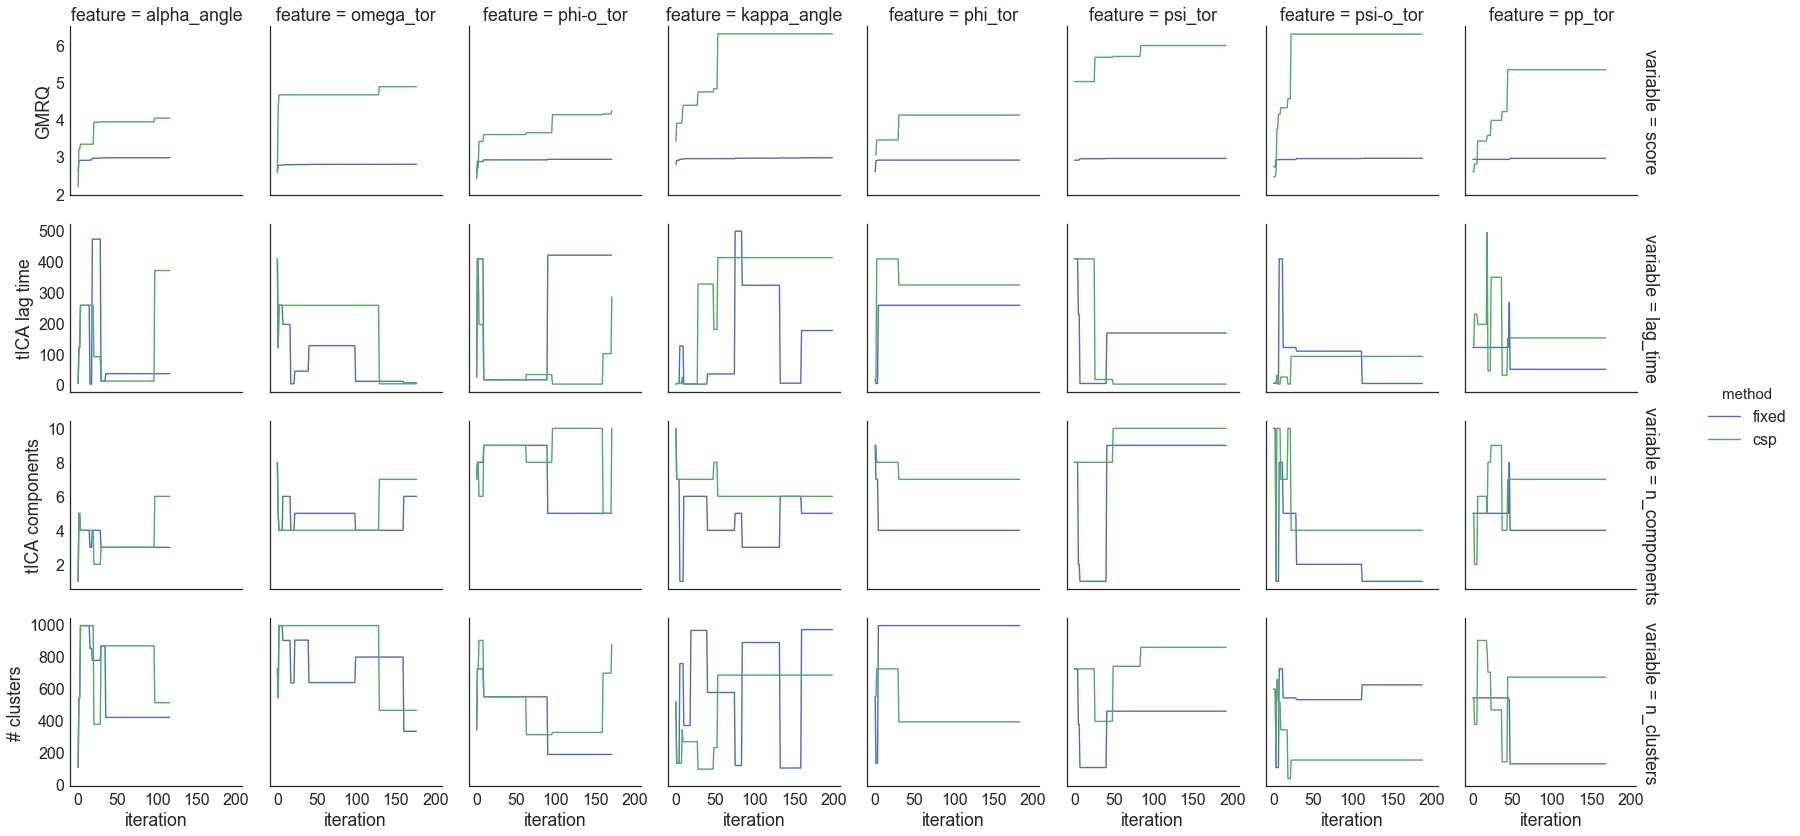

In [247]:
row_orders = ['score', 'lag_time', 'n_components', 'n_clusters']
row_labels = ['GMRQ', 'tICA lag time', 'tICA components', '# clusters']
with sns.plotting_context('paper', font_scale=2):
    sns.set_style('white')
    g = sns.FacetGrid(data = best_df, row='variable', col='feature',hue='method', 
                      sharey='row', sharex=True, margin_titles=True, row_order=row_orders)
    g = g.map(plt.plot, 'iteration','value')
    g = g.add_legend()
    g = g.set_titles("{col_name}")
    axes = g.axes
    for idx in range(axes.shape[0]):
        axes[idx,0].set_ylabel(row_labels[idx])